# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [5]:
#Frequencies for categorical columns (or small integer columns)
for col in ['sex','children', 'smoker', 'region', 'insuranceclaim']:
    print(col)
    print(medical[col].value_counts())
    print('\n')

sex
1    676
0    662
Name: sex, dtype: int64


children
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


smoker
0    1064
1     274
Name: smoker, dtype: int64


region
2    364
3    325
1    325
0    324
Name: region, dtype: int64


insuranceclaim
1    783
0    555
Name: insuranceclaim, dtype: int64




__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ This data is very skewed. Mean and standard deviation are not as informative for such a skewed distribution.

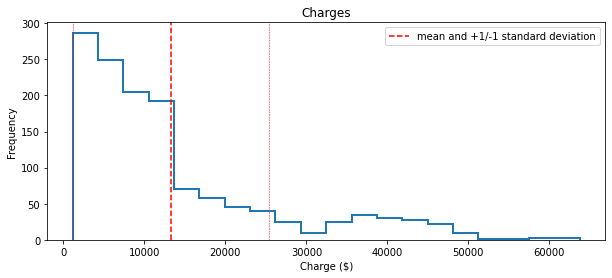

sample mean:	 13270.422265141257 	 sample std: 12110.011236694001


In [6]:
for col in [medical.charges]:
    m = col.mean()
    s = col.std(ddof=1)
    col.hist(bins=20, histtype='step', linewidth=2, grid=False, figsize=(10,4))
    for i in range(-1,2):  # Draw verical lines at mean and at each of 3 standard deviations above and below mean
        if i == 0:
            plt.axvline(m+i*s, linestyle='--', linewidth=1.5, color='red', label='mean and +1/-1 standard deviation') 
        else:
            plt.axvline(m+i*s, linestyle='--', linewidth=0.5, color='red') 
    plt.legend(loc='upper right')
    plt.title('Charges')
    plt.xlabel('Charge ($)')
    plt.ylabel('Frequency')
    #plt.xlim(0, col.max()*1.02)
plt.show()

print('sample mean:\t',m,'\t sample std:',s)

# <span style="color:green"/>This is definitely a skewed distribution. If it was up to me, I would either log-transform this data or use non-parametric statistics. The standard deviation is not terribly helpful here. The sample mean is likely to be quite different from the median.<span/>

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ The mean (13270) is well above 12000, although the standard deviation (12110) is very wide. However, there are 1338 samples, so the standard error is 331, and the estimated confidence interval assuming a normal distribution (mean +/- 1.96 critical Z value * standard error) is 12622 to 13919. Therefore, it's unlikely that the average charge has dropped below 12000.

In [7]:
charges_sem = np.std(medical.charges)/np.sqrt(len(medical.charges))
charges_sem

330.9437139060842

In [10]:
lower_thresh = np.mean(medical.charges) - (charges_sem * 1.96)
upper_thresh = np.mean(medical.charges) + (charges_sem * 1.96)
print('95% confidence interval:',np.round(lower_thresh,2),'to',np.round(upper_thresh,2))

95% confidence interval: 12621.77 to 13919.07


__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ I suppose a one-sided interval is appropriate. The one sided interval is 12728 and above. This is well above the 12000 figure that draws the administrator's concern, so the administrator should not be concerned.

In [11]:
lower_thresh = np.mean(medical.charges) - (charges_sem * 1.64) # Z-value of 1.64 is the critical value for this interval.
print('one sided 95% confidence interval is {:.2f} and above:'.format(lower_thresh,2))

one sided 95% confidence interval is 12727.67 and above:


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ Null hypothesis is that both groups are charged the same. Alternative hypothesis is that the mean charge is significantly different between the two groups.
This form of the t-test makes the assumption that the two groups have equal variance.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ The t-value of -11.89 is definitely significant. 

In [17]:
insurance_subset_0 = medical[medical.insuranceclaim==0]
insurance_subset_1 = medical[medical.insuranceclaim==1]

n0 = len(insurance_subset_0)
n1 = len(insurance_subset_1)
print(n0, n1)

555 783


In [18]:
s_pooled = np.sqrt(( (n0-1) * insurance_subset_0['charges'].std()**2 + (n1-1) * insurance_subset_1['charges'].std()**2 )/ (n0 + n1 - 2) )
print('std subset 0:',insurance_subset_0['charges'].std())
print('std subset 1:',insurance_subset_1['charges'].std())
print('\n')
print('Pooled std:', s_pooled)

std subset 0: 6446.510126811738
std subset 1: 14045.928418802134


Pooled std: 11520.034268775262


In [20]:
t_manual = ( np.mean(insurance_subset_0['charges']) - np.mean(insurance_subset_1['charges']) ) / ( s_pooled * np.sqrt( (1/n0) + (1/n1) ) )
print('t-value:', t_manual)

t-value: -11.89329903087671


In [21]:
#scipy function
from scipy.stats import ttest_ind
t_scipy, p_scipy = ttest_ind(insurance_subset_0['charges'], insurance_subset_1['charges'])
print('scipy calculates \n t-value:\t', t_scipy,'\n p-value:\t', p_scipy)

scipy calculates 
 t-value:	 -11.893299030876712 
 p-value:	 4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ There is no z-test in scipy, according to the documentation for version 1.6

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test